# Tugas Praktikum
Tugas Praktikum: Multiple Linear Regression dengan Dataset Medical Cost Personal Datasets

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

In [ ]:
# Import first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv')
data.head()

Mounted at /content/drive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

# Independent variables (features)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# Dependent variable (target)
y = data['charges']

print("Independent variables (X):")
display(X.head())
print("\nDependent variable (y):")
display(y.head())

Independent variables (X):


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest



Dependent variable (y):


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (1070, 11)
Shape of X_test_scaled: (268, 11)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: 0.7835929767120722
Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753652


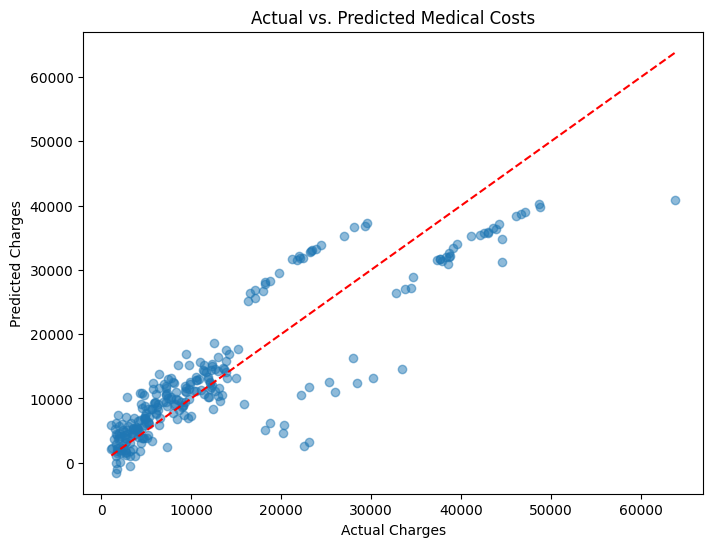

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Medical Costs')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal reference line
plt.show()


- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan,  termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

## Penjelasan

"Medical Cost Personal Datasets" berisi informasi tentang orang dan pengeluaran medisnya. digunakan untuk memprediksi pengeluaran kesehatan berdasarkan variabel individunya.

**Variabel Independen (Fitur):**

*   **age:** Umur (integer).
*   **sex:** Jenis kelamin individu (categorical: male or female).
*   **bmi:** Body Mass Index, idealnya pada nilai 18.5 ke 24.9 (float).
*   **children:** jumlah anak yang di-cover oleh perusahaan insuransi (integer).
*   **smoker:** Apakah individu adalah seorang perokok atau tidak (categorical: yes or no).
*   **region:** Area tempat tinggal individu di AS (categorical: northeast, southeast, southwest, northwest).

**Dependent Variable (Target):**

*   **charges:** Jumlah pengeluaran yang diberikan pada insuransi (float).

In [ ]:
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: 0.7835929767120722
Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753652


*   Nilai R^2 dari model regresi linier adalah sekitar 0.7836, yang menunjukkan bahwa sekitar 78.36% variasi dalam tagihan medis dapat dijelaskan oleh variabel independen dalam model.
*   Mean Absolute Error (MAE) sekitar \$4181.19, yang menunjukkan bahwa, rata-rata, prediksi model meleset sekitar \$4181.19.
*   Mean Squared Error (MSE) sekitar 33.596.915,85, yang mewakili rata-rata kuadrat selisih antara tagihan medis aktual dan yang diprediksi.
*   Scatter plot dari biaya medis aktual jika dibandingkan dengan prediksi menunjukkan tren umum di sepanjang garis referensi, yang mengindikasikan kemampuan model untuk menangkap sebagian variabilitas. Namun, plot juga menunjukkan tebaran data, terutama pada nilai tagihan yang lebih tinggi, yang menunjukkan area di mana prediksi model menyimpang lebih jauh.
*   Meskipun model ini menjelaskan sebagian besar varians, rata-rata kesalahan sekitar $4181 menunjukkan bahwa prediksinya masih bisa ditingkatkan. Feature engineering lebih lanjut, mengeksplorasi hubungan non-linier, atau mencoba algoritma regresi yang berbeda mungkin dapat meningkatkan akurasi model
*   Scatter plot menunjukkan bahwa model mungkin kesulitan memprediksi biaya medis yang lebih tinggi secara akurat. Menyelidiki outlier atau karakteristik khusus dari individu dengan tagihan medis tinggi dapat membantu untuk memperbaiki model.
